In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [8]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [9]:
df=pd.read_csv("Iris.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
df.shape

(150, 6)

In [13]:
df.drop('Id',axis=1,inplace=True)

In [14]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#count the value
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [16]:
#finding the null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

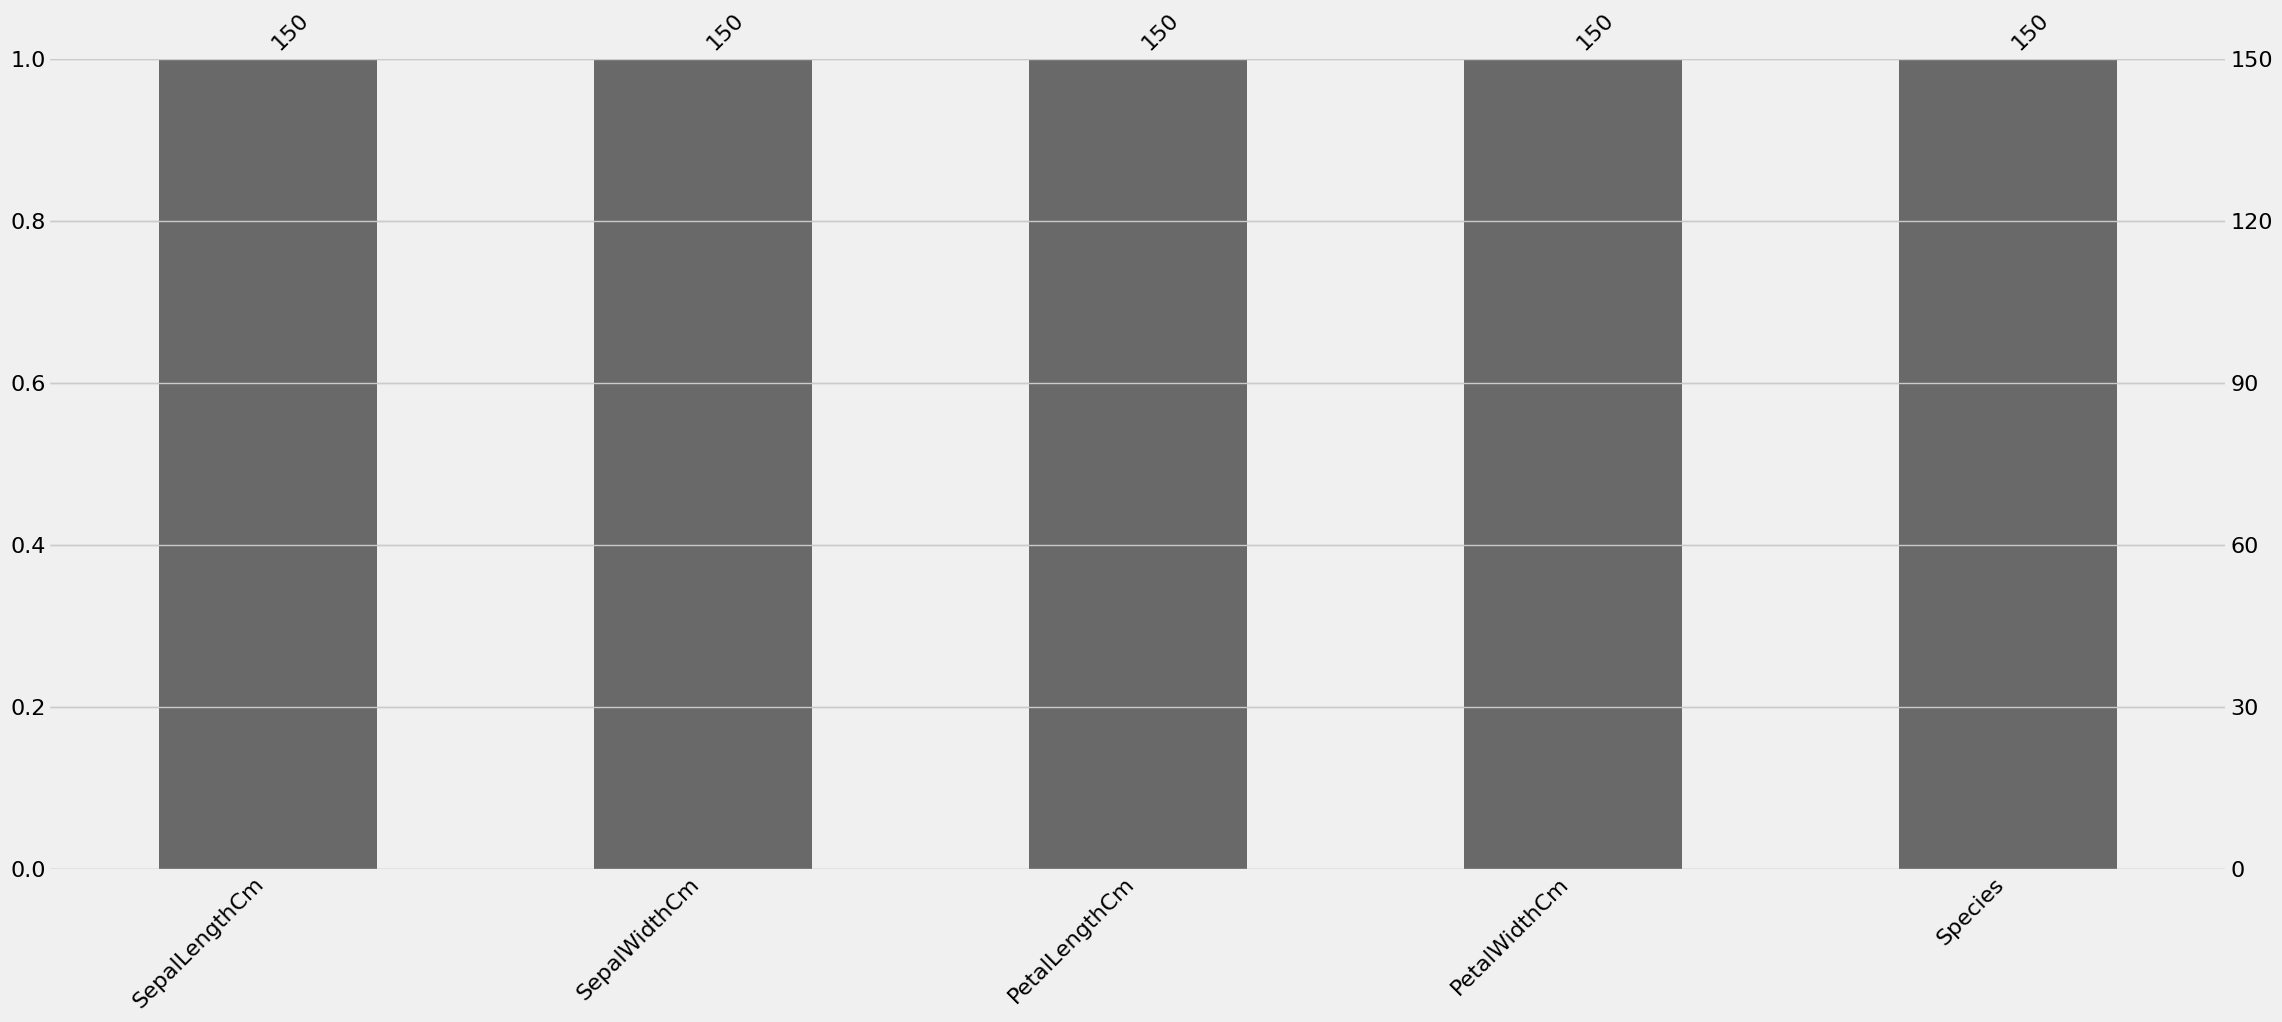

In [17]:
import missingno as msno
msno.bar(df)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

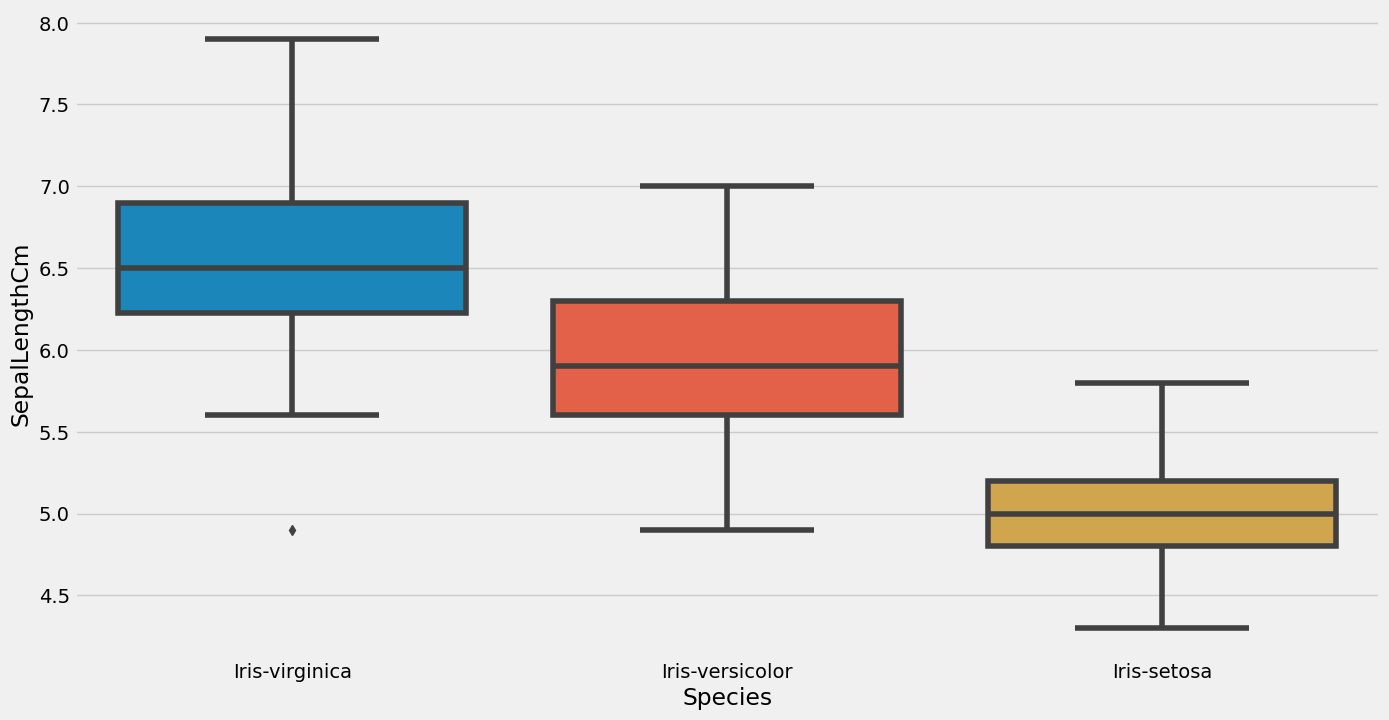

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

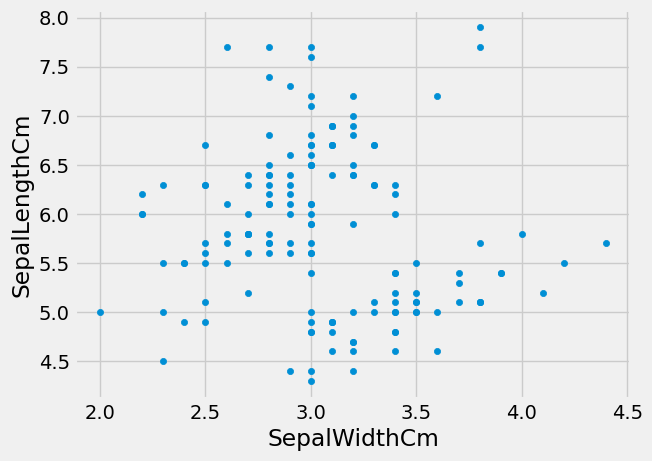

In [19]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

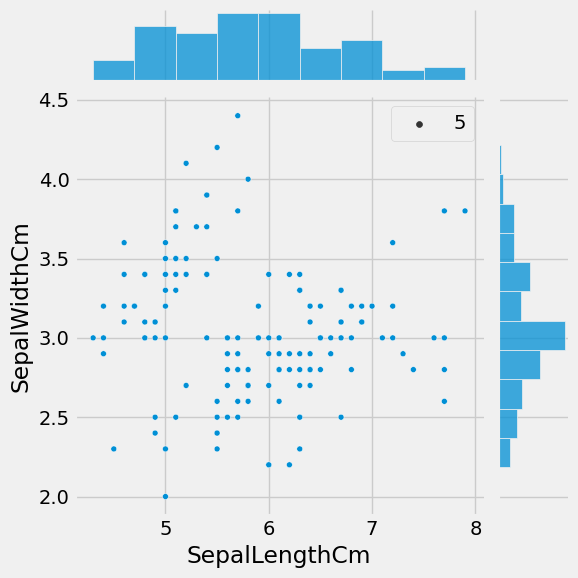

In [20]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

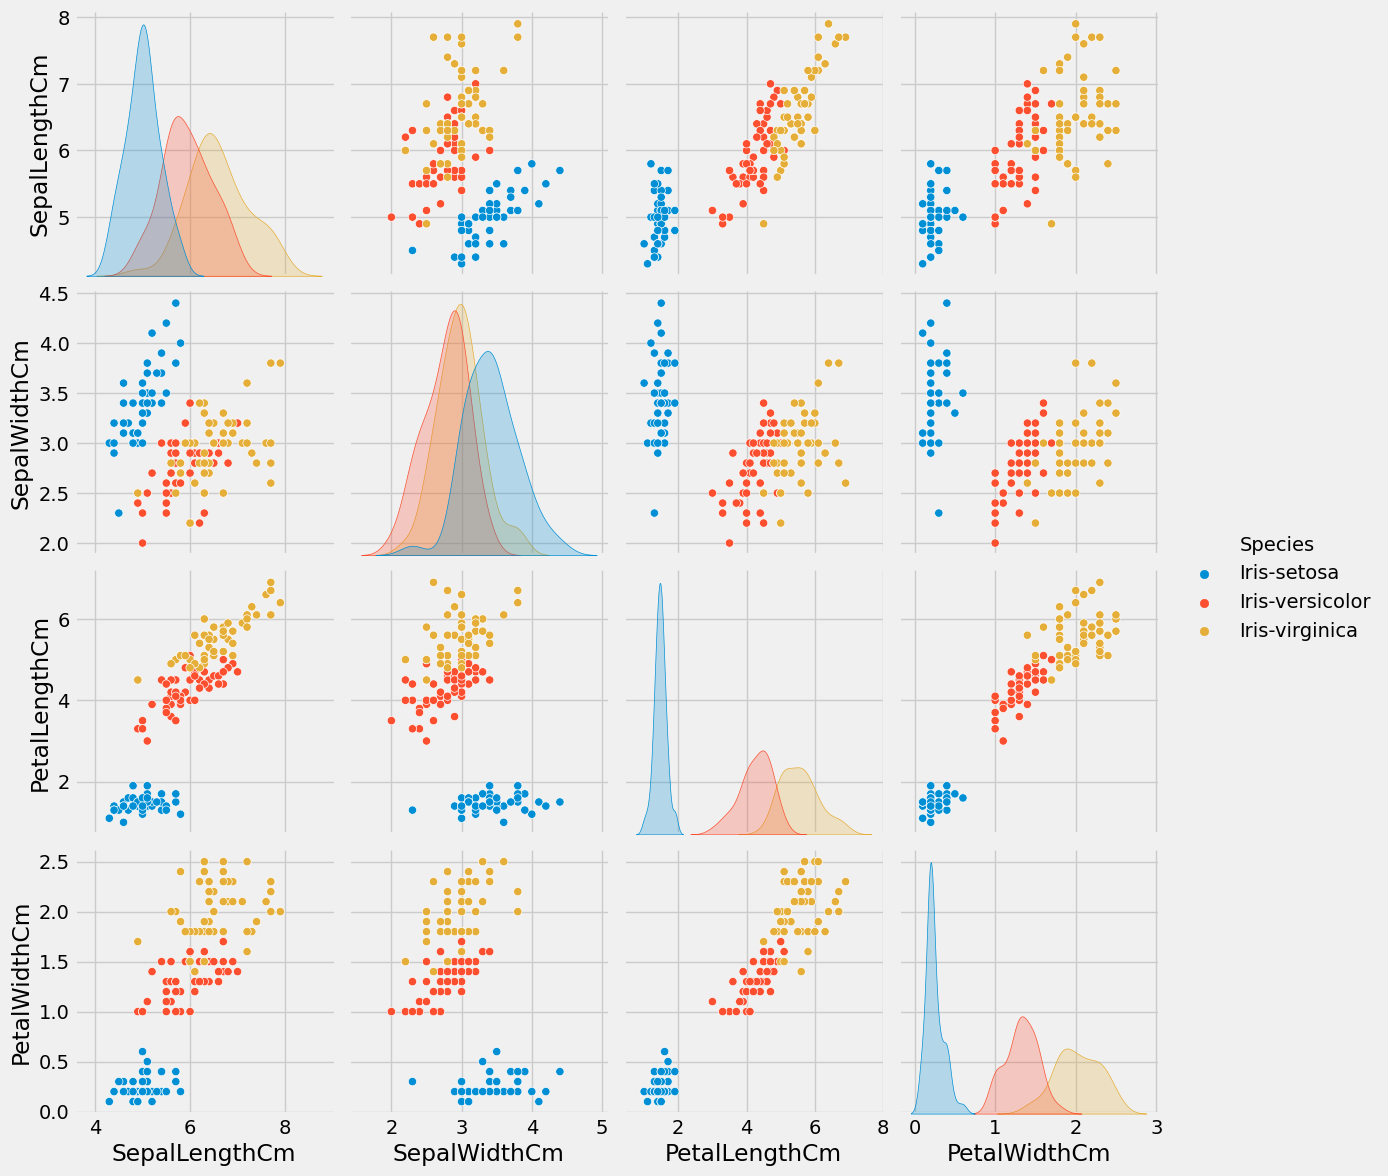

In [21]:
sns.pairplot(df, hue="Species", size=3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

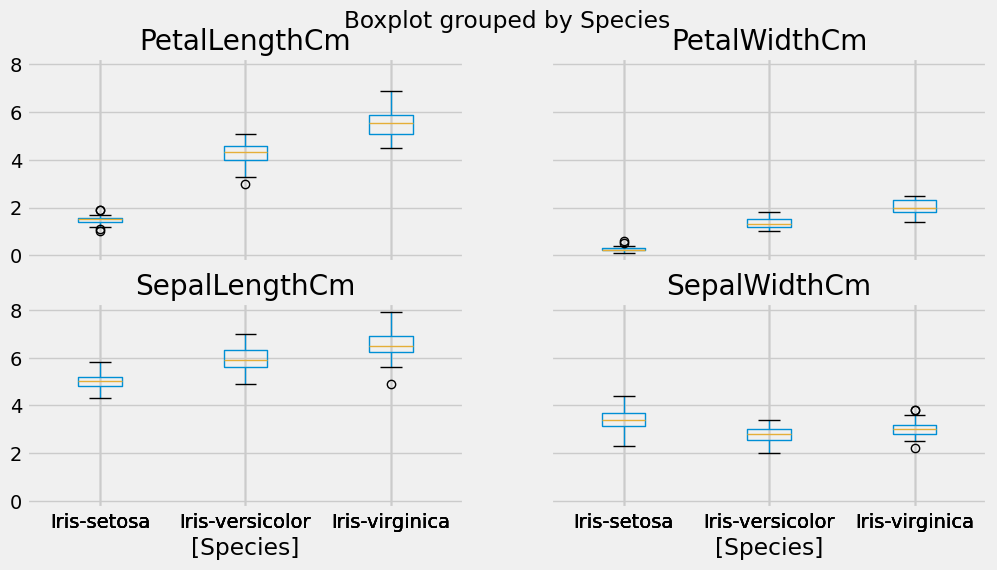

In [22]:
df.boxplot(by="Species", figsize=(12, 6))

<Axes: >

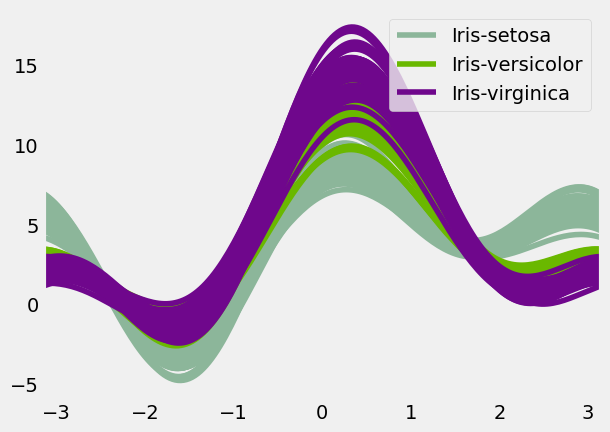

In [23]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

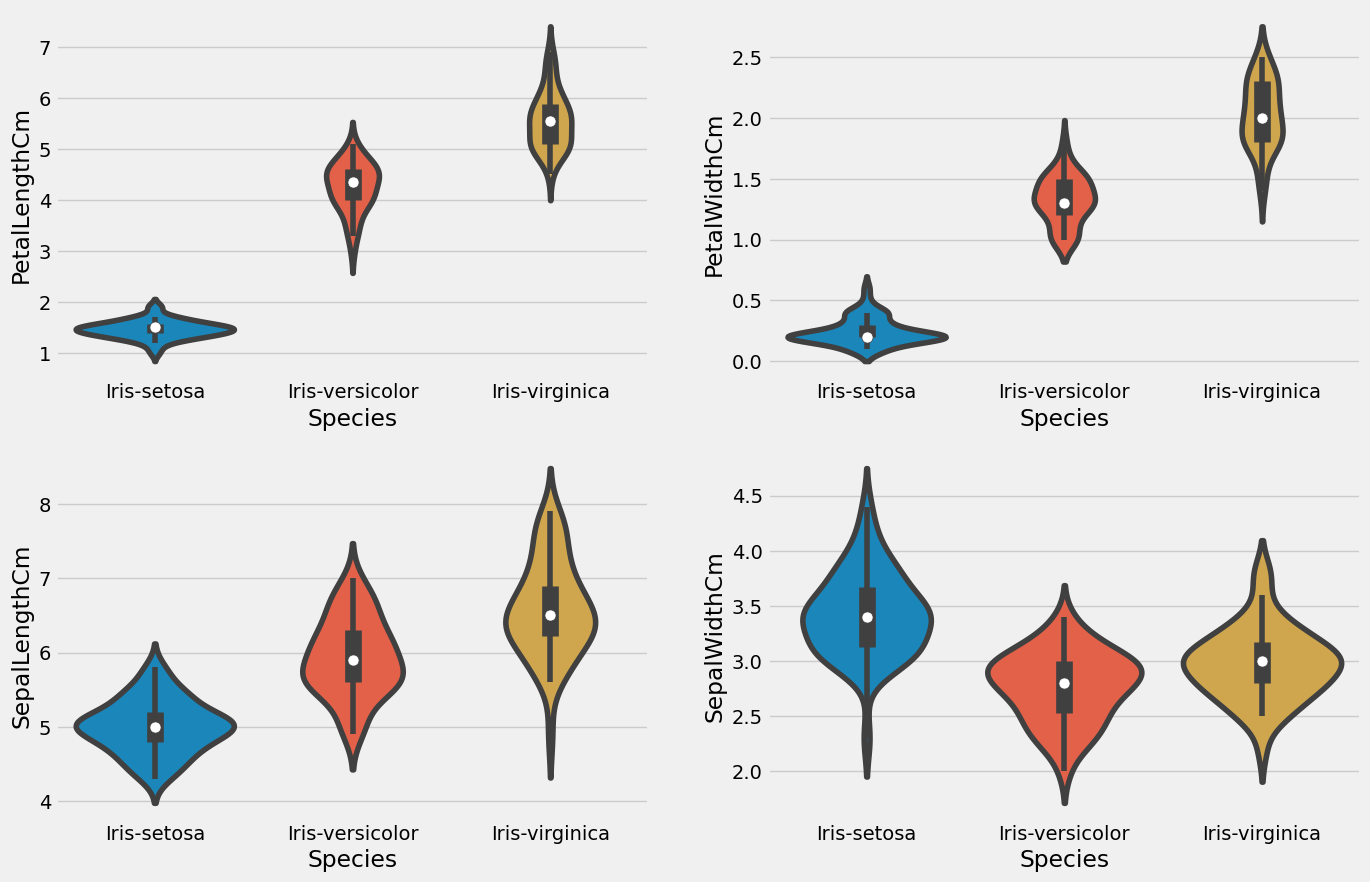

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [25]:
X=df.drop('Species',axis=1)
y=df['Species']


In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [27]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
y = to_categorical(df.Species)


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [29]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [30]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 2s 157ms/step - loss: 1.6956 - accuracy: 0.3333 - val_loss: 1.4689 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 26ms/step - loss: 1.3844 - accuracy: 0.3333 - val_loss: 1.2193 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 23ms/step - loss: 1.1737 - accuracy: 0.3333 - val_loss: 1.0768 - val_accuracy: 0.3333
Epoch 4/45
4/4 [==============================] - 0s 17ms/step - loss: 1.0611 - accuracy: 0.3333 - val_loss: 1.0081 - val_accuracy: 0.6889
Epoch 5/45
4/4 [==============================] - 0s 21ms/step - loss: 1.0083 - accuracy: 0.6476 - val_loss: 0.9670 - val_accuracy: 0.6444
Epoch 6/45
4/4 [==============================] - 0s 16ms/step - loss: 0.9609 - accuracy: 0.6571 - val_loss: 0.9299 - val_accuracy: 0.6444
Epoch 7/45
4/4 [==============================] - 0s 16ms/step - loss: 0.9271 - accuracy: 0.6571 - val_loss: 0.8912 - val_accuracy: 0.6667
Epoch 8/45
4/4 [==========

In [32]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.3873 - accuracy: 0.9556


[0.38734495639801025, 0.9555555582046509]

In [33]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 91ms/step
[[0.0236258  0.46776313 0.5086111 ]
 [0.85839236 0.12596369 0.01564385]
 [0.09239373 0.5757772  0.33182907]
 [0.05446623 0.59001845 0.35551527]
 [0.9203631  0.07211623 0.00752068]
 [0.00439983 0.31242177 0.68317837]
 [0.02175196 0.44564396 0.5326041 ]
 [0.03219002 0.51355016 0.45425978]
 [0.00666982 0.3461464  0.6471837 ]
 [0.0062248  0.29637286 0.6974023 ]]


In [34]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 0 1 1 0 2 2 1 2 2]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [35]:
history.history['accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.6476190686225891,
 0.6571428775787354,
 0.6571428775787354,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7333333492279053,
 0.8190476298332214,
 0.8285714387893677,
 0.8095238208770752,
 0.7523809671401978,
 0.723809540271759,
 0.7523809671401978,
 0.7904762029647827,
 0.800000011920929,
 0.8380952477455139,
 0.8571428656578064,
 0.8571428656578064,
 0.9047619104385376,
 0.9428571462631226,
 0.9238095283508301,
 0.9238095283508301,
 0.9428571462631226,
 0.9333333373069763,
 0.9047619104385376,
 0.8761904835700989,
 0.8571428656578064,
 0.8761904835700989,
 0.9047619104385376,
 0.9238095283508301,
 0.9333333373069763,
 0.9428571462631226,
 0.9523809552192688,
 0.9523809552192688,
 0.9523809552192688,
 0.9523809552192688,
 0.9523809552192688,
 0.961904764175415,
 0.9714285731315613,
 0.9714285731315613]

In [36]:
history.history['val_accuracy']

[0.3333333432674408,
 0.3333333432674408,
 0.3333333432674408,
 0.6888889074325562,
 0.644444465637207,
 0.644444465637207,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.7111111283302307,
 0.8222222328186035,
 0.8222222328186035,
 0.8222222328186035,
 0.7555555701255798,
 0.7333333492279053,
 0.7555555701255798,
 0.7555555701255798,
 0.800000011920929,
 0.7777777910232544,
 0.8444444537162781,
 0.8444444537162781,
 0.8444444537162781,
 0.9333333373069763,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.8666666746139526,
 0.8444444537162781,
 0.8444444537162781,
 0.8444444537162781,
 0.8444444537162781,
 0.8444444537162781,
 0.8888888955116272,
 0.8888888955116272,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9111111164093018,
 0.9555555582046509,
 0.9555555582046509,
 0.9777777791023254,
 0.9555555582046509]

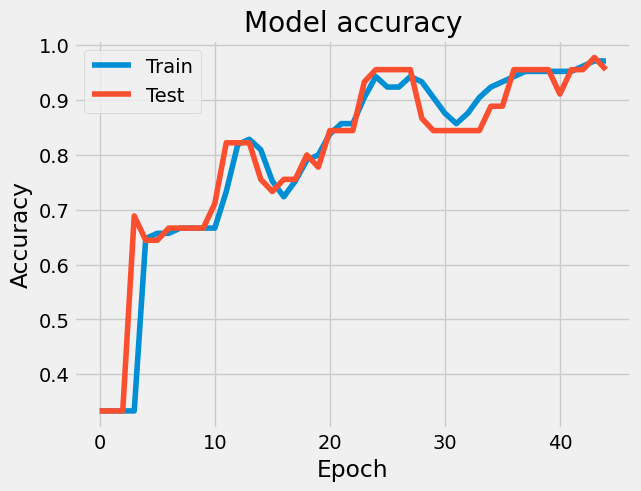

In [37]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

